# Movies ETL

In [73]:
import json
import pandas as pd
import numpy as np
import re

## Extract Data

In [2]:
file_dir = '/Users/kevineapen/Desktop/UCB Data Analysis Projects/Movies ETL/Movies-ETL/Resources'

In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
          wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records

wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records

wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle

wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [325]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)

ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [326]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [327]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.00,90.00,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.00,1.00
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.00,360.00,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.00,3.00
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.00,90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.80,6.00
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.00,87.00,[],Released,NaN,Satan Triumphant,False,0.00,0.00
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.00,75.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.00,0.00


In [328]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
42348,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,83729,tt2133298,de,Offroad,NaN,...,2012-01-11,0.00,94.00,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Offroad,False,5.30,12.00
12181,False,"{'id': 356437, 'name': 'Living Trilogy', 'post...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.royandersson.com/dulevande/,5817,tt0445336,sv,Du levande,"In the Swedish city of Lethe, people from diff...",...,2007-09-21,0.00,95.00,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,"You, the Living",False,7.10,63.00
44365,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 16, 'nam...",NaN,165095,tt1352408,ru,"Ух ты, говорящая рыба!","Created in 1983, the animated movie uses the p...",...,1983-01-31,0.00,8.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Wow! A Talking Fish!,False,8.70,6.00
39797,False,NaN,2000000,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",https://www.facebook.com/DayLightsEndMovie/,399894,tt3007132,en,Daylight's End,Years after a mysterious plague has devastated...,...,2016-04-16,0.00,120.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dead Rise When Daylight Ends,Daylight's End,False,5.30,37.00
31814,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,104965,tt0204908,uz,Bo Ba Bu,Two barbarians in the desert find a stranded w...,...,1998-01-01,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Bo Ba Bu,False,0.00,0.00


In [329]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.00,1425941529
1,1,147,4.50,1425942435
2,1,858,5.00,1425941523
3,1,1221,5.00,1425941546
4,1,1246,5.00,1425941556


In [330]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.00,1257031564
26024285,270896,60069,5.00,1257032032
26024286,270896,63082,4.50,1257031764
26024287,270896,64957,4.50,1257033990
26024288,270896,71878,2.00,1257031858


In [331]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
4283049,44470,2184,3.50,1127089314
156842,1638,12,3.50,1295976981
14047750,145990,5300,4.50,1336628842
12042003,124883,2455,5.00,1289348649
21932416,227841,3174,4.00,967730282


## Transform Data

### Data Cleaning

In [332]:
# Put raw wiki movie data into a Pandas DataFrame
wiki_data_df = pd.DataFrame(wiki_movies_raw)

In [333]:
# Look at the first 5 rows of the DataFrame
wiki_data_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,"1,990.00",https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...","1,990.00",https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),"1,990.00",https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),"1,990.00",https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,"1,990.00",https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
# Get the full list of columns and view them
wiki_data_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [335]:
# Use list comprehension to filter data by movies with a Director and imdb link
wiki_movies = [movie for movie in wiki_movies_raw
               if('Director' in movie or 'Directed by' in movie)
                  and 'imdb_link' in movie
                  and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [336]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
# Check movie language columns
# Checking Arabic movies
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [338]:
# Check out wiki pages for the Arabic movies
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [339]:
# Some movies contain alternate titles. Examine the columns again. 
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer',
       'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by',
       'Preceded by', 'Adaptation by', 'Suggested by', 'Traditional',
       'Mandarin', 'Released', 'Recorded', 'Venue', 'Length', 'Label',
       'Director', 'Producer', 'Also known as', 'Animation by',
       'Color process', 'Simplified', 'French', 'Screen story 

In [340]:
# Create function to clean movie data
def clean_movie(movie):
    
    movie = dict(movie) #create a non-destructive copy of movie data using local variable
    
    alt_titles = {} #empty dict to hold all of the alternative titles
    # combine alternative titles into one list
    # loop through list of alternative title keys
    for key in ['Also known as', 'Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # check if current key exists in the movie object
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    # after looping through all keys, add alt_titles dict to movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
        change_column_name('Adaptation by', 'Writer(s)')
        change_column_name('Country of origin', 'Country')
        change_column_name('Directed by', 'Director')
        change_column_name('Distributed by', 'Distributor')
        change_column_name('Edited by', 'Editor(s)')
        change_column_name('Length', 'Running time')
        change_column_name('Original release', 'Release date')
        change_column_name('Music by', 'Composer(s)')
        change_column_name('Produced by', 'Producer(s)')
        change_column_name('Producer', 'Producer(s)')
        change_column_name('Productioncompanies ', 'Production company(s)')
        change_column_name('Productioncompany ', 'Production company(s)')
        change_column_name('Released', 'Release Date')
        change_column_name('Release Date', 'Release date')
        change_column_name('Screen story by', 'Writer(s)')
        change_column_name('Screenplay by', 'Writer(s)')
        change_column_name('Story by', 'Writer(s)')
        change_column_name('Theme music composer', 'Composer(s)')
        change_column_name('Written by', 'Writer(s)')
            
    return movie

In [341]:
# Create list of cleaned movies
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [342]:
# Put clean movies into DataFrame and diplsay sorted list of columns
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [343]:
# Extract IMDb ID's, from imdb_link, into new column and drop duplicate imdb_id rows
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Recorded,Venue,Length,Label,Director,Producer,Animation by,Color process,Screen story by,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [344]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   url                     7033 non-null   object
 1   year                    7033 non-null   int64 
 2   imdb_link               7033 non-null   object
 3   title                   7032 non-null   object
 4   Directed by             7031 non-null   object
 5   Produced by             6673 non-null   object
 6   Screenplay by           2307 non-null   object
 7   Story by                996 non-null    object
 8   Based on                2181 non-null   object
 9   Starring                6849 non-null   object
 10  Narrated by             281 non-null    object
 11  Music by                6440 non-null   object
 12  Cinematography          6342 non-null   object
 13  Edited by               6339 non-null   object
 14  Productioncompany       4501 non-null   object
 15  Dist

In [345]:
# Remove columns with less than 90% non-null values
wiki_columns_to_keep = [column for column in wiki_movies_df.columns \
                        if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [346]:
wiki_movies_df.dtypes

url                     object
year                     int64
imdb_link               object
title                   object
Directed by             object
Produced by             object
Screenplay by           object
Story by                object
Based on                object
Starring                object
Music by                object
Cinematography          object
Edited by               object
Productioncompany       object
Distributed by          object
Release date            object
Running time            object
Country                 object
Language                object
Budget                  object
Box office              object
Written by              object
Productioncompanies     object
imdb_id                 object
dtype: object

In [347]:
# Need to convert box office, budget, and running time columns to numeric, release date column to datetime
# Get count of total number of rows (non-null) in box office column
wiki_movies_df['Box office'].count()

5485

In [348]:
# drop rows with null values in box office column and save result as a variable
box_office = wiki_movies_df['Box office'].dropna()

In [349]:
# Create a function to identify values in box office data that are not string data types
def is_not_a_string(x):
    return type(x) != str

box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [350]:
# Use lambda function to produce same result as above cell
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [351]:
# Join list data by concatenating each list element into one string
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [352]:
# First form for box office data using regex
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [353]:
# Count how many box office values match the first form
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [354]:
# Second form for box office data using regex
form_two = r'\$\d{1,3}(?:,\d{3})+'

In [355]:
# Count how many box office values match the second form
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [356]:
# Create Boolean Series for each form and select box office values that don't match either form
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [357]:
# Update forms to capture some of the values forms have missed
# Update for values with spaces between $ and number, and values with period separators instead of comma separators
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

# Update for values given as range, and values that misspell million as 'millon'
# Use .replace() method for replacing lower limit number with '$'
box_office = box_office.str.replace(r'\$*[-–—](?![a-z])', '$', regex=True)
# Place optional second 'i' in match string using '?'
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [358]:
# Update Boolean Series for each form and select box office values that don't match either updated form
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                         $20$30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [359]:
# Extract parts of strings that match of of the two regex forms created
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [360]:
# Create function to convert extracted values to floating-point numeric values
def parse_dollars(s):
    
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and "million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and "billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value
        
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value
        
    # otherwise, return NaN
    else:
        return np.nan

In [361]:
# Parse the box office values to numeric values
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [362]:
# Confrim new column contains numeric values
wiki_movies_df['box_office']

0             21,400,000.00
1              2,700,000.00
2             57,718,089.00
3              7,331,647.00
4              6,939,946.00
               ...         
7071          41,900,000.00
7072          76,100,000.00
7073          38,400,000.00
7074           5,500,000.00
7075                    NaN
Name: box_office, Length: 7033, dtype: float64

In [363]:
# Remove old non-numeric 'Box office' column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [364]:
# Parse the budget data
# Create a budget variable with only the non-null budget values
budget = wiki_movies_df['Budget'].dropna()

In [365]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [366]:
# Remove any values between $ and a hyphen
budget = budget.str.replace(r'\$.*[-–—](?![a-z])', '$', regex=True)

In [367]:
# Using same pattern matches created for box office data, apply to budget data and select the budget values that don't match either form
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [368]:
# Remove citation references from budget data
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [369]:
# Parse the budget values to numeric values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [370]:
# Confirm new budget column contains numeric values
wiki_movies_df['budget']

0             20,000,000.00
1              6,000,000.00
2             35,000,000.00
3             12,000,000.00
4             25,000,000.00
               ...         
7071          42,000,000.00
7072          60,000,000.00
7073          20,000,000.00
7074           9,000,000.00
7075                    NaN
Name: budget, Length: 7033, dtype: float64

In [371]:
# Drop old non-numeric budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [372]:
# Parse Release Date
# Create variable to store non-null values of release date column, while converting any lists to strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [373]:
# Create regex forms to parse release date data
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [374]:
# Extract the release dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [375]:
# Parse release date data using Pandas to_datetime function
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0],infer_datetime_format=True)


In [376]:
# Confirm new release date column contains datetime values
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-11-08
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [377]:
# Parse running time
# Create variable to store non-null values of running time column, and convert any lists in the values to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [378]:
# Use regex to see how many running time values are formatted as '{x} minutes'
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [379]:
# Use regex to see how many running time values ARE NOT formated as '{x} minutes' and display the values in these non-matching rows
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 364, dtype: object

In [380]:
# Use regex to get rows again but allowing more variations of displaying 'minutes' by just searching for the words just starting with m
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6876

In [381]:
# Use regext to see the rows do not follow the structure that 6,876 entries do (as resulted above)
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running time, dtype: object

In [382]:
# Relax regex starting pattern condition and create hour + minute pattern regex to capture some of the non-matching running time values
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d*)\s*m')

In [383]:
# Convert values to numeric values. use to_numeric and coerce in case of empty strings (to turn empty strings into NaN values, then fillna(0)
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [384]:
# convert hour capture groups to minutes
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis =1)

In [385]:
# Confirm new running time column contains numeric minutes values
wiki_movies_df['running_time']

0                    102.00
1                    114.00
2                    113.00
3                    106.00
4                     95.00
               ...         
7071                  90.00
7072                 132.00
7073                 120.00
7074                 123.00
7075                  90.00
Name: running_time, Length: 7033, dtype: float64

In [386]:
# Drop old non-numeric running time column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [387]:
wiki_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7075
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   url                   7033 non-null   object        
 1   year                  7033 non-null   int64         
 2   imdb_link             7033 non-null   object        
 3   title                 7032 non-null   object        
 4   Directed by           7031 non-null   object        
 5   Produced by           6673 non-null   object        
 6   Screenplay by         2307 non-null   object        
 7   Story by              996 non-null    object        
 8   Based on              2181 non-null   object        
 9   Starring              6849 non-null   object        
 10  Music by              6440 non-null   object        
 11  Cinematography        6342 non-null   object        
 12  Edited by             6339 non-null   object        
 13  Productioncompany 

In [388]:
# Check kaggle data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [389]:
kaggle_metadata.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [390]:
# Check if all values are either True or False in adult column
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [391]:
# Show rows where adult column is not True or False
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
# Only keep rows where adult column value is False, and then drop adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [393]:
# Check if all values are either True or False in video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [394]:
# video column to Boolean data type
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [395]:
# Convert numeric columns to numeric data types
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [396]:
# Convert release date column to datetime data type
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [397]:
# Reasonability checks on ratings data
# show info on ratings dataset
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [398]:
# Convert timestamp from unix time standard (unix epoch) to datetime
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [399]:
# Replace ratings timestamp column values with the datetime conversion
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

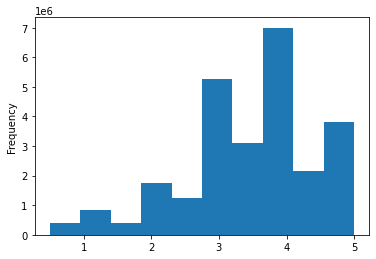

In [400]:
# Ratings distribution
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

### Merge Datasets

In [401]:
# Merge wiki and kaggle datasets
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [402]:
# Check columns for redundant information
movies_df.head().T

,0,1,2,3,4
url,https://en.wikipedia.org/wiki/The_Adventures_o...,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://en.wikipedia.org/wiki/Air_America_(film),https://en.wikipedia.org/wiki/Alice_(1990_film),https://en.wikipedia.org/wiki/Almost_an_Angel
year,1990,1990,1990,1990,1990
imdb_link,https://www.imdb.com/title/tt0098987/,https://www.imdb.com/title/tt0098994/,https://www.imdb.com/title/tt0099005/,https://www.imdb.com/title/tt0099012/,https://www.imdb.com/title/tt0099018/
title_wiki,The Adventures of Ford Fairlane,"After Dark, My Sweet",Air America,Alice,Almost an Angel
Directed by,Renny Harlin,James Foley,Roger Spottiswoode,Woody Allen,John Cornell
Produced by,"[Steve Perry, Joel Silver]","[Ric Kidney, Robert Redlin]",Daniel Melnick,Robert Greenhut,John Cornell
Screenplay by,"[David Arnott, James Cappe, Daniel Waters]","[James Foley, Robert Redlin]","[John Eskow, Richard Rush]",NaN,NaN
Story by,"[David Arnott, James Cappe]",NaN,NaN,NaN,NaN
Based on,"[Characters, by Rex Weiner]","[the novel, After Dark, My Sweet, by, Jim Thom...","[Air America, by, Christopher Robbins]",NaN,NaN
Starring,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Jason Patric, Rachel Ward, Bruce Dern, George...","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...","[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...","[Paul Hogan, Elias Koteas, Linda Kozlowski]"


| **Wikipedia**         | **Kaggle**           | **Resolution**                                                                                   |
|-----------------------|----------------------|--------------------------------------------------------------------------------------------------|
| title_wiki            | title_kaggle         | Drop Wikipedia. Title data is more specific and consistent in Kaggle.                            |
| running_time          | runtime              | Keep Kaggle; fill in zeros with Wikipedia data. More zeros and outliers in Wikipedia.            |
| budget_wiki           | budget_kaggle        | Keep Kaggle; fill in zeros with Wikipedia data. More zeros in Kaggle. More outliers in Wikipedia.|
| box_office            | revenue              | Keep Kaggle; fill in zeros with Wikipedia data. More zeros in Kaggle. More outliers in Wikipedia.|
| release_date_wiki     | release_date_kaggle  | Drop Wikipedia. Kaggle has no nulls, while Wikipedia has many nulls.                             |
| Language              | original_language    | Drop Wikipedia. Kaggle is in a more consistent and usable format.                                |
| Production company(s) | production_companies | Drop Wikipedia. Kaggle is much more consistent and viewable.                                     |

In [403]:
# Titles
movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [404]:
# Look at title columns' rows where titles don't match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [405]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

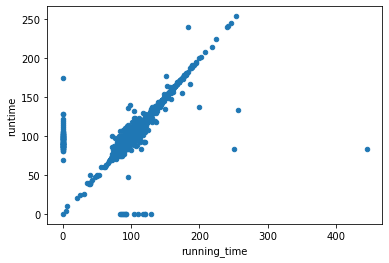

In [406]:
# Runtime
# Use scatter plot to compare data in runtime vs. running_time columns
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

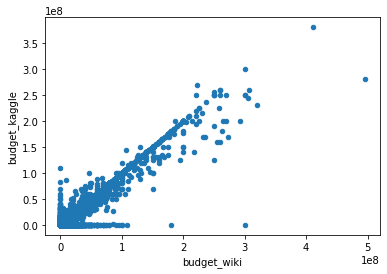

In [407]:
# Budget
# Use scatter plot to compare data in budget_kaggle vs. budget_wiki columns
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

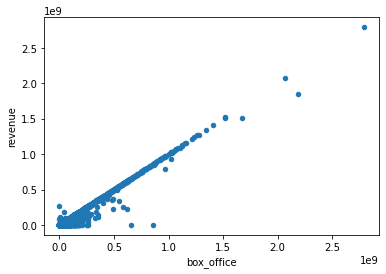

In [408]:
# Box Office
# Use scatter plot to compare data in revenue vs. box_office columns
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

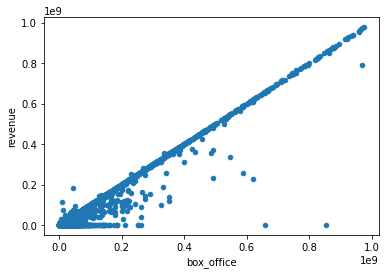

In [409]:
# Redo scatter looking at only everything less than 1 billion USD box_office/revenue
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

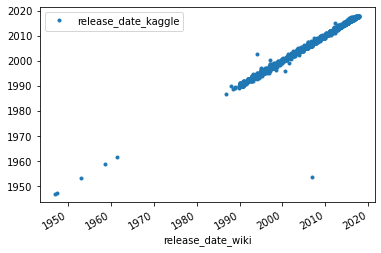

In [410]:
# Release Date
# Use scatter plot to compare data in release_date_kaggle vs. release_date_wiki
movies_df[['release_date_wiki', 'release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [411]:
# Investigate outlier data point approx.((2005-2010),(1950-1955))
movies_df[(movies_df['release_date_wiki'] > '2005-01-01') & (movies_df['release_date_kaggle'] < '1955-01-01')].T

,3607
url,https://en.wikipedia.org/wiki/The_Holiday
year,2006
imdb_link,https://www.imdb.com/title/tt00457939/
title_wiki,The Holiday
Directed by,Nancy Meyers
Produced by,"[Nancy Meyers, Bruce A. Block]"
Screenplay by,NaN
Story by,NaN
Based on,NaN
Starring,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl..."


In [412]:
# Two different movies 'The Holiday' and 'From Here to Eternity's data were merged together
# Get index of corrupted data and drop the row at that index
movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '2005-01-01') & (movies_df['release_date_kaggle'] < '1955-01-01')].index, inplace=True)

In [413]:
# Check for null values in release_date_wiki
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
22,https://en.wikipedia.org/wiki/Camp_Cucamonga,1990,https://www.imdb.com/title/tt0099212/,Camp Cucamonga,Roger Duchowny,NaN,NaN,NaN,NaN,"[John Ratzenberger, Brian Robbins, Jennifer An...",...,1990-09-23,0.00,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Camp Cucamonga,False,4.70,9.00
24,https://en.wikipedia.org/wiki/Cartoon_All-Star...,1990,https://www.imdb.com/title/tt0154129/,Cartoon All-Stars to the Rescue,"[Milton Gray, Marsh Lamore, Bob Shellhorn, Mik...",NaN,NaN,NaN,NaN,NaN,...,1990-04-21,0.00,26.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Drugs don't stand a chance against these guys!,Cartoon All-Stars to the Rescue,False,6.00,5.00
28,https://en.wikipedia.org/wiki/The_China_Lake_M...,1990,https://www.imdb.com/title/tt0099259/,The China Lake Murders,Alan Metzger,NaN,NaN,NaN,NaN,"[Isaac Allan, Tom Skerritt, Michael Parks]",...,1990-01-31,0.00,97.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Every year, Officer Donnelly goes to China Lak...",The China Lake Murders,False,0.00,0.00
186,https://en.wikipedia.org/wiki/Treasure_Island_...,1990,https://www.imdb.com/title/tt0100813/,Treasure Island,Fraser Clarke Heston,NaN,NaN,NaN,NaN,"[Charlton Heston, Christian Bale, Oliver Reed,...",...,1990-06-08,0.00,131.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sail the high seas. Battle the pirates. Live t...,Treasure Island,False,5.60,36.00
330,https://en.wikipedia.org/wiki/Perfect_Harmony_...,1991,https://www.imdb.com/title/tt0102653/,Perfect Harmony,Will Mackenzie,NaN,NaN,NaN,NaN,NaN,...,1991-03-31,0.00,89.00,[],Released,NaN,Perfect Harmony,False,3.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,https://en.wikipedia.org/wiki/44_Minutes:_The_...,2003,https://www.imdb.com/title/tt0362389/,44 Minutes: The North Hollywood Shoot-Out,Yves Simoneau,NaN,NaN,NaN,NaN,"[Michael Madsen, Ron Livingston]",...,2003-01-01,0.00,103.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,44 Minutes: The North Hollywood Shoot-Out,False,6.40,17.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,Bille August,NaN,NaN,NaN,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3390,https://en.wikipedia.org/wiki/No_Direction_Home,2005,https://www.imdb.com/title/tt0367555/,No Direction Home,Martin Scorsese,NaN,NaN,NaN,NaN,Bob Dylan,...,2005-07-21,0.00,208.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bob Dylan. Songwriter. Rocker. Rebel. Legend.,No Direction Home: Bob Dylan,False,7.50,33.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,"[Gregg Kavet, Andy Robin]",NaN,NaN,NaN,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [414]:
# Language
# Use value counts to compare data in original_language vs. Language.
movies_df['Language'].value_counts()

English                        5479
[English, Spanish]               68
[English, French]                35
[English, Japanese]              25
[English, Russian]               23
                               ... 
[English /, Zulu]                 1
[English, Hebrew, Spanish]        1
[English, Japanese, French]       1
[English, Spanish, Apache]        1
Russian                           1
Name: Language, Length: 197, dtype: int64

In [415]:
# Example of how to convert lists in Language to tuples if Language data lists were 'unhashable'
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [416]:
# Now check value_counts for original_language (Kaggle data)
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [417]:
# Production Companies
movies_df[['production_companies']]

,production_companies
0,[{'name': 'Twentieth Century Fox Film Corporat...
1,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[{'name': 'IndieProd Company Productions', 'id..."
3,"[{'name': 'Orion Pictures', 'id': 41}]"
4,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...
6047,"[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [418]:
# Drop columns where necessary
movies_df.drop(columns=['title_wiki', 'release_date_wiki', 'Language'], inplace=True)

In [419]:
# Create a function that fills in missing data for a column pair and then drops the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    
    df[kaggle_column] = df.apply(
    lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column], axis=1)
    
    df.drop(columns=wiki_column, inplace=True)

In [420]:
# Run fuction for the three column pairs that need to fill in zeros
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Music by,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,Sebastián Lelio,"[Juan de Dios Larraín, Pablo Larraín]",NaN,NaN,NaN,"[Daniela Vega, Francisco Reyes]",Matthew Herbert,...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,Brian Crano,"[Brian Crano, Rebecca Hall]",NaN,NaN,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",NaN,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Andrey Zvyagintsev,"[Alexander Rodnyansky, Sergey Melkumov, Gleb F...","[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...","[Evgueni Galperine, Sacha Galperine]",...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,Aaron Katz,"[Mynette Louie, Sara Murphy, Adele Romanski]",NaN,NaN,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Keegan DeWitt,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [421]:
# Double check column value counts to be sure there is adequate information in the columns (>1 value)
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    
    if num_values == 1:
        print(col)

video


In [422]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6051 entries, 0 to 6051
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    6051 non-null   object        
 1   year                   6051 non-null   int64         
 2   imdb_link              6051 non-null   object        
 3   Directed by            6051 non-null   object        
 4   Produced by            5860 non-null   object        
 5   Screenplay by          2110 non-null   object        
 6   Story by               912 non-null    object        
 7   Based on               1972 non-null   object        
 8   Starring               5939 non-null   object        
 9   Music by               5670 non-null   object        
 10  Cinematography         5567 non-null   object        
 11  Edited by              5632 non-null   object        
 12  Productioncompany      4070 non-null   object        
 13  Dis

In [423]:
# Check video column
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [424]:
# Reorder columns
# Order:
# Identifying information (IDs, titles, URLs, etc.)
# Quantitative facts (runtime, budget, revenue, etc.)
# Qualitative facts (genres, languages, country, etc.)
# Business data (production companies, distributors, etc.)
# People (producers, director, cast, writers, etc.)

movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributed by',
                       'Produced by','Directed by','Starring','Cinematography','Edited by','Screenplay by', 'Story by', 'Music by','Based on'
                      ]]

In [425]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributed by':'distributor',
                  'Produced by':'producers',
                  'Directed by':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Edited by':'editors',
                  'Screenplay by':'screen_writers',
                  'Story by':'story_writers',
                  'Music by':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [426]:
movies_df

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,distributor,producers,director,starring,cinematography,editors,screen_writers,story_writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.00,"49,000,000.00",...,20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.00,"6,000,000.00",...,Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",NaN,Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.00,"35,000,000.00",...,TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",NaN,Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.00,"12,000,000.00",...,Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,NaN,NaN,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.00,"25,000,000.00",...,Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,NaN,NaN,Maurice Jarre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,tt5639354,429191,A Fantastic Woman,Una mujer fantástica,NaN,NaN,https://en.wikipedia.org/wiki/A_Fantastic_Woman,https://www.imdb.com/title/tt5639354/,104.00,NaN,...,"[Participant Media (Chile), Piffl Medien (Germ...","[Juan de Dios Larraín, Pablo Larraín]",Sebastián Lelio,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,Soledad Salfate,NaN,NaN,Matthew Herbert,NaN
6048,tt5390066,390059,Permission,Permission,NaN,NaN,https://en.wikipedia.org/wiki/Permission_(film),https://www.imdb.com/title/tt5390066/,96.00,NaN,...,Good Deed Entertainment,"[Brian Crano, Rebecca Hall]",Brian Crano,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Matt Friedman,NaN,NaN,NaN,NaN
6049,tt6304162,429174,Loveless,Нелюбовь,NaN,NaN,https://en.wikipedia.org/wiki/Loveless_(film),https://www.imdb.com/title/tt6304162/,128.00,NaN,...,"[Sony Pictures Releasing, (Russia), [1]]","[Alexander Rodnyansky, Sergey Melkumov, Gleb F...",Andrey Zvyagintsev,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,Anna Mass,"[Oleg Negin, Andrey Zvyagintsev]",NaN,"[Evgueni Galperine, Sacha Galperine]",NaN
6050,tt5795086,412302,Gemini,Gemini,NaN,NaN,https://en.wikipedia.org/wiki/Gemini_(2017_film),https://www.imdb.com/title/tt5795086/,92.00,NaN,...,Neon,"[Mynette Louie, Sara Murphy, Adele Romanski]",Aaron Katz,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,Aaron Katz,NaN,NaN,Keegan DeWitt,NaN


In [427]:
movies_df.head().T

,0,1,2,3,4
imdb_id,tt0098987,tt0098994,tt0099005,tt0099012,tt0099018
kaggle_id,9548,25501,11856,8217,25943
title,The Adventures of Ford Fairlane,"After Dark, My Sweet",Air America,Alice,Almost an Angel
original_title,The Adventures of Ford Fairlane,"After Dark, My Sweet",Air America,Alice,Almost an Angel
tagline,Kojak. Columbo. Dirty Harry. Wimps.,All they risked was everything.,The few. The proud. The totally insane.,NaN,Who does he think he is?
belongs_to_collection,NaN,NaN,NaN,NaN,NaN
wikipedia_url,https://en.wikipedia.org/wiki/The_Adventures_o...,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://en.wikipedia.org/wiki/Air_America_(film),https://en.wikipedia.org/wiki/Alice_(1990_film),https://en.wikipedia.org/wiki/Almost_an_Angel
imdb_link,https://www.imdb.com/title/tt0098987/,https://www.imdb.com/title/tt0098994/,https://www.imdb.com/title/tt0099005/,https://www.imdb.com/title/tt0099012/,https://www.imdb.com/title/tt0099018/
runtime,104.00,114.00,112.00,102.00,95.00
budget,"49,000,000.00","6,000,000.00","35,000,000.00","12,000,000.00","25,000,000.00"


In [435]:
# Transform and Merge Ratings Data

# Take the count by movieid for each rating using groupby
ratings = ratings.drop(columns='timestamp')
rating_counts = ratings.groupby(['movieId', 'rating'], as_index=False).count()

In [436]:
rating_counts

,movieId,rating,userId
0,1,0.50,441
1,1,1.00,804
2,1,1.50,438
3,1,2.00,2083
4,1,2.50,1584
...,...,...,...
239376,176267,4.00,1
239377,176269,3.50,1
239378,176271,5.00,1
239379,176273,1.00,1


In [437]:
# Rename userid column to 'count'
rating_counts = ratings.groupby(['movieId', 'rating'], as_index=False).count().rename({'userId': 'count'}, axis=1)

In [438]:
rating_counts

,movieId,rating,count
0,1,0.50,441
1,1,1.00,804
2,1,1.50,438
3,1,2.00,2083
4,1,2.50,1584
...,...,...,...
239376,176267,4.00,1
239377,176269,3.50,1
239378,176271,5.00,1
239379,176273,1.00,1


In [439]:
# pivot data so make movieid row index and rating column index
rating_counts = ratings.groupby(['movieId', 'rating'], as_index=False).count().rename({'userId': 'count'}, axis=1).pivot(index= 'movieId',
                                                                                                                         columns='rating',
                                                                                                                         values='count')

In [440]:
rating_counts

rating,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [441]:
# Rename columns with a 'rating_' prefix before merging with movies data
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [442]:
rating_counts

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.00,804.00,438.00,"2,083.00","1,584.00","11,577.00","5,741.00","22,020.00","5,325.00","15,995.00"
2,263.00,797.00,525.00,"2,479.00","1,810.00","8,510.00","2,916.00","6,035.00",690.00,"2,035.00"
3,169.00,772.00,233.00,"1,665.00",616.00,"6,213.00",759.00,"3,433.00",154.00,"1,483.00"
4,47.00,351.00,31.00,496.00,77.00,"1,133.00",66.00,557.00,12.00,211.00
5,237.00,785.00,270.00,"1,716.00",664.00,"6,608.00",723.00,"2,959.00",166.00,"1,130.00"
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [444]:
# Merge ratings data with movies dataset (left merge)
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [445]:
# Fill NaN's, where movies didn't have that particular rating for, with zeros
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

In [446]:
movies_with_ratings_df.head().T

,0,1,2,3,4
imdb_id,tt0098987,tt0098994,tt0099005,tt0099012,tt0099018
kaggle_id,9548,25501,11856,8217,25943
title,The Adventures of Ford Fairlane,"After Dark, My Sweet",Air America,Alice,Almost an Angel
original_title,The Adventures of Ford Fairlane,"After Dark, My Sweet",Air America,Alice,Almost an Angel
tagline,Kojak. Columbo. Dirty Harry. Wimps.,All they risked was everything.,The few. The proud. The totally insane.,NaN,Who does he think he is?
belongs_to_collection,NaN,NaN,NaN,NaN,NaN
wikipedia_url,https://en.wikipedia.org/wiki/The_Adventures_o...,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://en.wikipedia.org/wiki/Air_America_(film),https://en.wikipedia.org/wiki/Alice_(1990_film),https://en.wikipedia.org/wiki/Almost_an_Angel
imdb_link,https://www.imdb.com/title/tt0098987/,https://www.imdb.com/title/tt0098994/,https://www.imdb.com/title/tt0099005/,https://www.imdb.com/title/tt0099012/,https://www.imdb.com/title/tt0099018/
runtime,104.00,114.00,112.00,102.00,95.00
budget,"49,000,000.00","6,000,000.00","35,000,000.00","12,000,000.00","25,000,000.00"
